# Basic Usage

<h2>Loading Relevant Libraries</h2>

In [1]:
from FLD_methods import *

<h2>Load Example Spectral Data From SCOPE</h2>

In [2]:
e_spectra = get_simulated_spectral_df('Esun_example.csv') + get_simulated_spectral_df('/Users/jameswallace/Desktop/Project/data/verification_run_2021-06-14-1239/Esky.csv')
l_spectra = get_simulated_spectral_df('Lo_spectrum_inclF_example.csv')

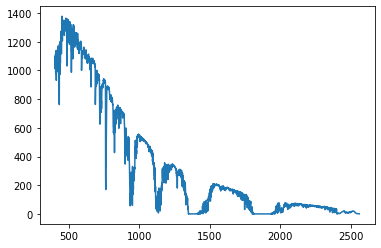

In [3]:
plt.plot(e_spectra.iloc[30])

The 'get_simulated_spectral_df' function extracts the hyperspectral data from a csv file and places it in a pandas dataframe with columns named from 400 to 2562.

In [4]:
e_spectra.head() # show the top of the pandas dataframe containing the E_spectra

,400,401,402,403,404,405,406,407,408,409,...,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561
0,762.41540,713.86390,771.24480,720.10360,782.96950,697.56130,686.79500,710.25660,727.46720,802.01720,...,1.275431,1.182825,1.094863,1.010975,0.938320,0.875757,0.816150,0.759049,0.710475,0.664150
1,37.02911,34.67117,37.45822,34.97453,38.02803,33.88001,33.35728,34.49697,35.33306,38.95416,...,1.275200,1.182610,1.094665,1.010793,0.938149,0.875598,0.816003,0.758913,0.710346,0.664030
2,373.94310,350.12990,378.27350,353.19020,384.02420,342.13400,336.85360,348.36090,356.80240,393.36730,...,1.275032,1.182454,1.094521,1.010660,0.938025,0.875482,0.815896,0.758814,0.710252,0.663943
3,1043.83830,977.36360,1055.92340,985.90430,1071.97490,955.04320,940.30570,972.43060,995.99730,1098.06980,...,1.275389,1.182785,1.094827,1.010941,0.938288,0.875728,0.816123,0.759024,0.710451,0.664128
4,524.21480,490.82480,530.26830,495.09750,538.31060,479.58540,472.18230,488.30830,500.13920,551.39160,...,1.275198,1.182608,1.094663,1.010791,0.938147,0.875597,0.816001,0.758912,0.710345,0.664029


<h2>Apply the FLD Methods to the First Row of the Spectras to Extract the Fluorescence</h2>

In [5]:
# get the first rows of the spectra dataframes
# the methods take the spectras a np arrays so convert the object to this type

e_first_row = np.asarray(e_spectra.iloc[0])
l_first_row = np.asarray(l_spectra.iloc[0])
wavelengths = np.arange(400, 2562) # define the wavelengths at which the spectras were sampled

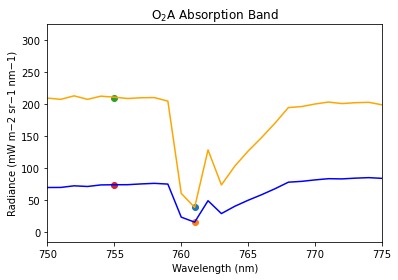

2.1825743558511697

In [6]:
# apply the sFLD method and show the plot

sFLD(e_first_row / np.pi, l_first_row, wavelengths, fwhm = 1, band = 'A', plot = True)

The plot shows the E spectra (Orange) and L spectra (Blue) at the O2A absorption band. The plotted points show the sFLD selection for the spectra values inside and outside of the absorption feature. The value shown is the fluorescence retrieved at the O2A absorption band.

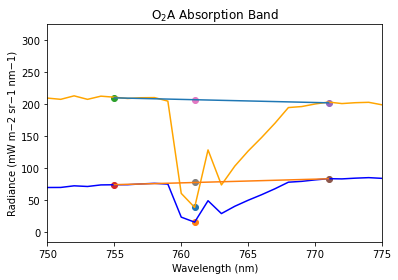

1.1659635408570277

In [7]:
# apply the 3FLD method and show the plot
three_FLD(e_first_row / np.pi, l_first_row, wavelengths, fwhm =1, band = 'A', plot = True)

The plot shows the E spectra (Orange) and L spectra (Blue) at the O2A absorption band. The plotted points show the 3FLD selection for the spectra values inside and on the shoulders of the absorption feature. The straight line plotted shows the interpolation between the two shoulders of the absorption feature and the interpolated point plotted shows the spectra value selected "outside" of the absorption feature. The value shown is the fluorescence retrieved at the O2A absorption band.

<h2>Resample the Data at Different FWHM for Sensor Simulation</h2>

In [8]:
# generate the spectras and wavelengths resampled at 3.5 nm
e_resampled, resampled_wavelengths = resample_spectra(fwhm = 3.5, spectra = e_first_row)
l_resampled = resample_spectra(fwhm=3.5, spectra= l_first_row)[0]

The 'resample_wavelengths' functions recieves the target fwhm and the desired spectra as inputs. A Gaussian convolution is then applied to the spectra and the function returns the spectra at the desired fwhm as well as the new sampling wavelengths for the spectra.

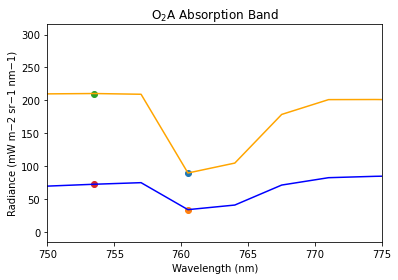

5.210083739356226

In [9]:
# now apply the FLD methods to the resampled data

sFLD(e_resampled / np.pi, l_resampled, resampled_wavelengths, fwhm = 3.5, band = 'A', plot = True)

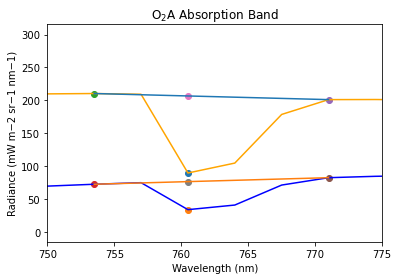

1.2545734449127466

In [10]:
three_FLD(e_resampled / np.pi, l_resampled, resampled_wavelengths, fwhm = 3.5, band = 'A', plot = True)

# Test Implementation of iFLD method

Text(0, 0.5, 'Apparent Reflectance ($ \\frac{L * \\pi}{E}$)')

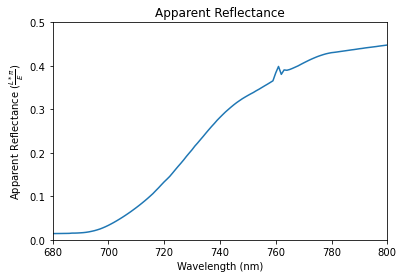

In [11]:
# plot the apparent reflectance
r_app = (l_first_row * np.pi) / e_first_row
plt.plot(wavelengths, r_app)
plt.xlim(680, 800)
plt.ylim(0, 0.5)
plt.title('Apparent Reflectance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Apparent Reflectance ($ \\frac{L * \\pi}{E}$)')

Text(0, 0.5, 'Apparent Reflectance ($ \\frac{L * \\pi}{E}$)')

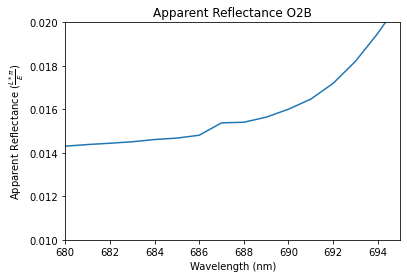

In [12]:
# plot O2B band
r_app = (l_first_row * np.pi) / e_first_row
plt.plot(wavelengths, r_app)
plt.xlim(680, 695)
plt.ylim(0.01, 0.02)
plt.title('Apparent Reflectance O2B')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Apparent Reflectance ($ \\frac{L * \\pi}{E}$)')

Text(0, 0.5, 'Apparent Reflectance ($ \\frac{L * \\pi}{E}$)')

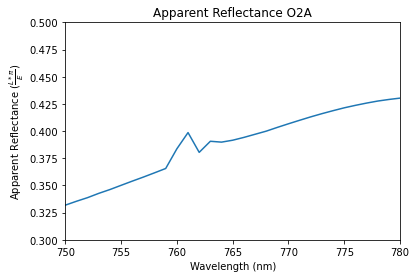

In [13]:
# plot O2A band
r_app = (l_first_row * np.pi) / e_first_row
plt.plot(wavelengths, r_app)
plt.xlim(750, 780)
plt.ylim(0.3, 0.5)
plt.title('Apparent Reflectance O2A')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Apparent Reflectance ($ \\frac{L * \\pi}{E}$)')

Text(0.5, 1.0, 'Apparent Reflectance with O2 absoprtion bands = NaN')

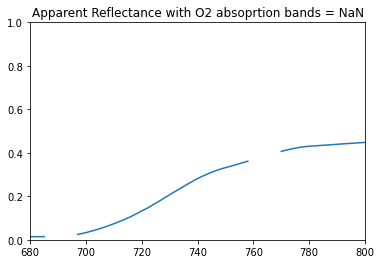

In [14]:
# define ranges of absorption bands
o2b_left_index = find_nearest(wavelengths, 686)
o2b_right_index = find_nearest(wavelengths, 697)
o2a_left_index = find_nearest(wavelengths, 759)
o2a_right_index = find_nearest(wavelengths, 770)
# set values in these ranges to NaN
r_app[o2b_left_index:o2b_right_index] = np.nan
r_app[o2a_left_index:o2a_right_index] = np.nan
# plot the resulting graph
plt.plot(wavelengths, r_app)
plt.xlim(680, 800)
plt.ylim(0, 1)
plt.title('Apparent Reflectance with O2 absoprtion bands = NaN')

In [15]:
# now define a spline fitting function to fit these undefined ranges
from scipy import interpolate

def cubic_spline(x_vals, y_vals, target_x):
    tck = interpolate.splrep(x_vals, y_vals)
    return(interpolate.splev(target_x, tck))

# Define a fitting function over NaN values

In [16]:
def fit_NaN(spectrum, wavelengths):
    '''
    spectrum: spectrum containing NaN values over the absorption regions
    wavelengths: wavelengths spectrum was sampled over
    Returns smoothed spectra
    '''
    
    # get the indicies of the empty absorption band areas in the spectrum
    
    nan_indices = np.argwhere(np.isnan(spectrum)) # get the indices of the nan values
    # slice the nan_indices array to get the NaN indices of the O2B band
    o2b_indices = nan_indices[:find_nearest(wavelengths[nan_indices], 697) + 1] 
    
    # define the size of the area to construct the spline fit around the unknown points
    search_size = 10
    
    # get the wavelength values around the O2B band
    x_vals_left = wavelengths[int(o2b_indices[0]) - search_size: int(o2b_indices[0])]
    x_vals_right = wavelengths[int(o2b_indices[-1]) + 1: int(o2b_indices[-1]) + search_size + 1]
    x_vals = np.append(x_vals_left, x_vals_right)
    
    # get the spectrum values around the O2B band
    y_vals_left = spectrum[int(o2b_indices[0]) - search_size: int(o2b_indices[0])]
    y_vals_right = spectrum[int(o2b_indices[-1]) + 1: int(o2b_indices[-1]) + search_size + 1]
    y_vals = np.append(y_vals_left, y_vals_right)

    # plot points selected outside of band
    plt.scatter(x_vals, y_vals, label = 'Known Points')
    plt.plot(wavelengths, spectrum, color = 'orange', label = 'Spectra')
    plt.xlim(675, 707)

    # now interpolate the values within the band using the known values in the search areas around
    inter_ys_b = cubic_spline(x_vals, y_vals, wavelengths[o2b_indices])
    
    # plot the constructed spline fit within the absorption band area
    plt.plot(wavelengths[o2b_indices], inter_ys_b, color = 'green', label = 'Spline Fit')
    plt.scatter(wavelengths[o2b_indices], inter_ys_b, color = 'green', label = 'Constructed Points')

    plt.xlabel('Wavelengths (nm)')
    plt.ylabel('Spectral Value')
    plt.title('O2B Band: iFLD Interpolation')

    plt.legend()
    plt.show()
    
    # do the same for the O2A absorption band
    
    # get the NaN indices of the O2B band
    o2a_indices = nan_indices[find_nearest(wavelengths[nan_indices], 697) + 1:]

    # now get the values around the null values that we will use for the spline fit
    x_vals_left = wavelengths[int(o2a_indices[0]) - search_size: int(o2a_indices[0])]
    x_vals_right = wavelengths[int(o2a_indices[-1]) + 1: int(o2a_indices[-1]) + search_size + 1]
    x_vals = np.append(x_vals_left, x_vals_right)
    y_vals_left = spectrum[int(o2a_indices[0]) - search_size: int(o2a_indices[0])]
    y_vals_right = spectrum[int(o2a_indices[-1]) + 1: int(o2a_indices[-1]) + search_size + 1]
    y_vals = np.append(y_vals_left, y_vals_right)

    # plot points selected outside of band
    plt.scatter(x_vals, y_vals, label = 'Known points')
    r_app_ref = (l_first_row * np.pi) / e_first_row
    plt.plot(wavelengths, spectrum, color = 'orange', label = 'Known Spectra')
    #plt.ylim(0.3, 0.5)
    plt.xlim(750, 775)

    # now interpolate within the band
    inter_ys = cubic_spline(x_vals, y_vals, wavelengths[o2a_indices])
    
    # plot the interpolated values within the band
    plt.plot(wavelengths[o2a_indices], inter_ys, color = 'green', label = 'Spline Fit')
    plt.scatter(wavelengths[o2a_indices], inter_ys, color = 'green', label = 'Constructed Points')

    plt.xlabel('Wavelengths (nm)')
    plt.ylabel('Spectral Value')
    plt.title('O2A Band: iFLD Interpolation')

    plt.legend()
    plt.show()
    
    # create smoothed array containing the interpolated values within the band
    
    smoothed = spectrum
    
    smoothed[o2a_indices] = inter_ys
    
    smoothed[o2b_indices] = inter_ys_b

    
    return(smoothed)
    

# Implement New iFLD Retrieval Algorithm

In [59]:
def iFLD(e_spectra, l_spectra, wavelengths, fwhm, band = 'A', plot=True):
    """ Applies the sFLD method at the O2A absorption band to extract the SIF

    Parameters
    ----------
    e_spectra : np array
        spectral array containing the incident solar radiance (directional)
    l_spectra : np array
        spectral array of the upwelling solar radiance
    wavelengths : np array
        array of the wavelength values
    fwhm: float
        full width half maximum at which the O2A band was sampled
    band: str: 'A' or 'B'
        Specifies which absorption band the retrieval algorithm should use, by default 'A' for O2A absorption band
    plot : bool, optional
        produce plot of values, by default True
    """
    
    r_app = l_spectra / e_spectra # get array of apparent reflectance values
    
    # replace the absorption band areas with NaN values to construct the smoothed arrays
    
    o2b_left_index = find_nearest(wavelengths, 686) # identify the areas containing the O2A and O2B bands
    o2b_right_index = find_nearest(wavelengths, 697)
    o2a_left_index = find_nearest(wavelengths, 759)
    o2a_right_index = find_nearest(wavelengths, 770)
    
    r_app_nan = r_app
    e_spectra_nan = np.copy(e_spectra)
    
    
    # set values in these ranges to NaN
    r_app_nan[o2b_left_index:o2b_right_index] = np.nan
    r_app_nan[o2a_left_index:o2a_right_index] = np.nan
    # do the same for the first row of the spectra
    e_spectra_nan[o2b_left_index:o2b_right_index] = np.nan
    e_spectra_nan[o2a_left_index:o2a_right_index] = np.nan
    
    
    # get the smoothed spectras using a spline fit within the absorption band
    r_smoothed = fit_NaN(r_app_nan, wavelengths)
    e_smoothed = fit_NaN(e_spectra_nan, wavelengths)
    
    
    # now calculate the coefficients for the iFLD method
    
    # alpha_R = R_out / smoothed_R_in
    # alpha_F = E_out * alpha_R / smoothed_E_in
    
    buffer_in = 5 #  range to look over within absorption feature
    buffer_out = 1 # range to look over outside of the absorption feature
    
    if band == 'A':
        out_in = 0.7535*fwhm+2.8937 # define amount to skip to shoulder from minimum
        wl_in = 760 # standard location of O2A absorption feature
    if band == 'B':
        out_in = 0.697*fwhm + 1.245 # define amount to skip to shoulder from minimum
        wl_in = 687 # standard location of the O2B aboorption band
    
    # find the points in given ranges
    # find the minimum inside of the band for E_in and L_in
    e_in_index, e_in = stats_on_spectra(wavelengths, wl_in - buffer_in, wl_in + buffer_in, e_spectra, 'min')
    l_in_index, l_in = stats_on_spectra(wavelengths, wl_in - buffer_in, wl_in + buffer_in, l_spectra, 'min')
    # find the average of the left shoulder for E_out and L_out
    e_out_index, e_out = stats_on_spectra(wavelengths, wl_in - buffer_out - out_in, wl_in - out_in, e_spectra, 'mean')
    l_out_index, l_out = stats_on_spectra(wavelengths, wl_in - buffer_out - out_in, wl_in - out_in, l_spectra, 'mean')
    
    r_out = l_out / e_out
    
    e_smoothed_in_index, e_smoothed_in = stats_on_spectra(wavelengths, wl_in - buffer_in, wl_in + buffer_in, e_smoothed, 'min')
    r_smoothed_in_index, r_smoothed_in = stats_on_spectra(wavelengths, wl_in - buffer_in, wl_in + buffer_in, r_smoothed, 'min')
    e_smoothed_in = e_smoothed[e_in_index]
    r_smoothed_in = r_smoothed[e_in_index]
    
    
    alpha_R = r_out / r_smoothed_in
    alpha_F = e_out * alpha_R / e_smoothed_in
    

    if plot == True: # plot spectra and points at absorption feature
        plt.plot(wavelengths, e_spectra, color = 'orange')
        plt.plot(wavelengths, l_spectra, color = 'blue')
        plt.plot(wavelengths, e_smoothed)
        plt.scatter(wavelengths[e_in_index], e_smoothed_in)
        plt.scatter(wavelengths[e_in_index], e_in, label = 'e_in')
        plt.scatter(wavelengths[l_in_index], l_in, label = 'l_in')
        plt.scatter(wavelengths[e_out_index], e_out, label = 'e_out')
        plt.scatter(wavelengths[l_out_index], l_out, label = 'l_out')
        #plt.legend()
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Radiance (mW m−2 sr−1 nm−1)')
        
        # zoom to absorption band
        
        if band == 'A':
            plt.xlim(750, 775)
            plt.title('O$_2$A Absorption Band: iFLD Fitting')
        
        if band == 'B':
            plt.xlim(680, 700)
            plt.title('O$_2$B Absorption Band: iFLD Fitting')
        
        plt.show() # show plot
    e_in 
    fluorescence = (alpha_R*e_out*l_in - e_in*l_out) / (alpha_R*e_out - alpha_F*e_in) # calculate fluorescence
    
    return(fluorescence)

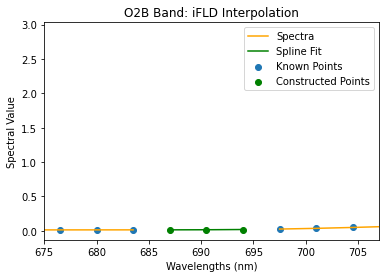

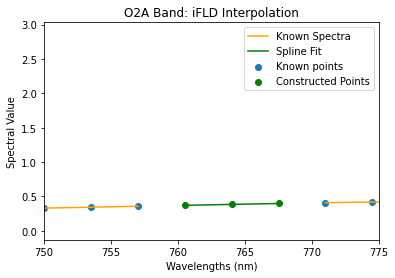

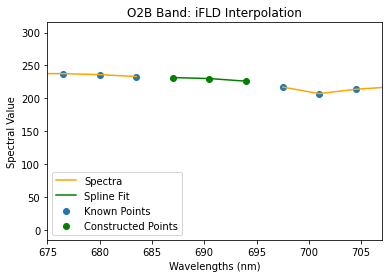

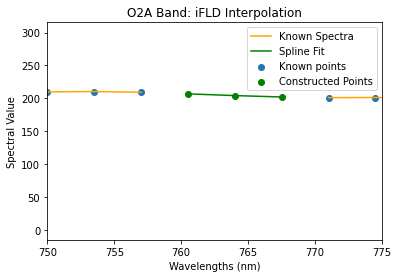

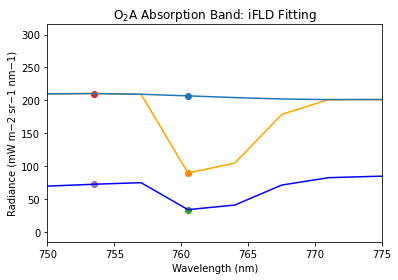

1.0077131014942926

In [67]:
iFLD(e_resampled/ np.pi, l_resampled, resampled_wavelengths, fwhm = 3.5, band = 'A')

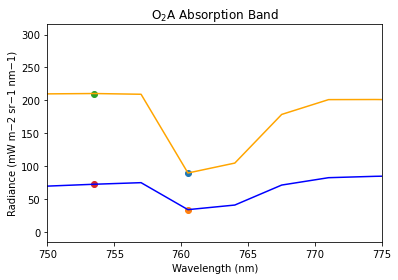

5.210083739356226

In [68]:
sFLD(e_resampled / np.pi, l_resampled, resampled_wavelengths, fwhm =3.5, band = 'A')

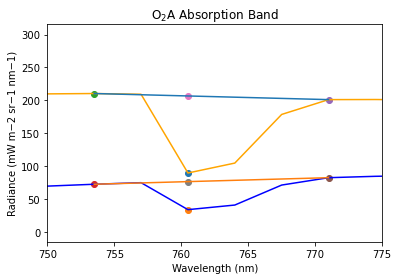

1.2545734449127466

In [70]:
three_FLD(e_resampled / np.pi, l_resampled, resampled_wavelengths, fwhm =3.5, band = 'A')